## <span style="color:red"> Data preprocessing🎯</span>


### <span style="color:blue">libraries we need</span>

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import LocalOutlierFactor

### <span style="color:blue">uploading the data and read it</span>


In [203]:
data=pd.read_csv('Credit-Dataset(1).csv')

In [204]:
df = data.copy() #one-hot encoding 

### <span style="color:blue">start understanding the data</span>


In [205]:
data.head() 

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [206]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         750 non-null    object
 1   duration                750 non-null    int64 
 2   credit_history          750 non-null    object
 3   purpose                 750 non-null    object
 4   credit_amount           750 non-null    int64 
 5   savings_status          750 non-null    object
 6   employment              750 non-null    object
 7   installment_commitment  750 non-null    int64 
 8   personal_status         750 non-null    object
 9   other_parties           750 non-null    object
 10  residence_since         750 non-null    int64 
 11  property_magnitude      750 non-null    object
 12  age                     750 non-null    int64 
 13  other_payment_plans     750 non-null    object
 14  housing                 750 non-null    object
 15  existi

# <span style="color:red">Task A </span>


### <span style="color:blue">acording to the our preprocessing we determine the type of each attribute as :</span>

### Nominal Attributes:
credit_history, purpose, personal_status, other_parties, property_magnitude, other_payment_plans, housing.

### Ordinal Attributes:
checking_status, savings_status, employment, job.

### Binary Attributes:
own_telephone, foreign_worker, class.

### Numeric Attributes (ratio):
duration, credit_amount, installment_commitment, residence_since, age, existing_credits, num_dependents

### <span style="color:blue">Summarize Numrical Attribute Statistics </span>


In [207]:
data.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,750.000000,750.00000,750.000000,750.000000,750.00000,750.000000,750.000000
mean,21.094667,3276.52400,2.969333,2.830667,35.53600,1.388000,1.157333
std,12.407644,2890.88566,1.115670,1.101943,11.32742,0.568525,0.364358
min,4.000000,250.00000,1.000000,1.000000,19.00000,1.000000,1.000000
25%,12.000000,1361.75000,2.000000,2.000000,27.00000,1.000000,1.000000
50%,18.000000,2322.50000,3.000000,3.000000,33.00000,1.000000,1.000000
75%,24.000000,3959.00000,4.000000,4.000000,42.00000,2.000000,1.000000
max,72.000000,18424.00000,4.000000,4.000000,75.00000,4.000000,2.000000


In [208]:
numeric_data = data.select_dtypes(include=['number'])

In [209]:
# Calculate variance for all numerical columns
variance = numeric_data.var()
print("Variance for each column:\n", variance)
# Calculate range for all numerical columns
range_values = numeric_data.max() - numeric_data.min()
print("Range for each column:\n", range_values)

Variance for each column:
 duration                  1.539496e+02
credit_amount             8.357220e+06
installment_commitment    1.244719e+00
residence_since           1.214279e+00
age                       1.283105e+02
existing_credits          3.232203e-01
num_dependents            1.327566e-01
dtype: float64
Range for each column:
 duration                     68
credit_amount             18174
installment_commitment        3
residence_since               3
age                          56
existing_credits              3
num_dependents                1
dtype: int64


### <span style="color:blue">Summarize nominal Attribute Statistics </span>


In [210]:
data_categorical_columns = data.select_dtypes(include=['object'])
categorical_summary = data_categorical_columns.describe()
print(categorical_summary)

       checking_status   credit_history   purpose savings_status employment  \
count              750              750       750            750        750   
unique               4                5        10              5          5   
top      'no checking'  'existing paid'  radio/tv           <100     1<=X<4   
freq               293              406       209            453        263   

       personal_status other_parties property_magnitude other_payment_plans  \
count              750           750                750                 750   
unique               4             3                  4                   3   
top      'male single'          none                car                none   
freq               414           683                256                 610   

       housing      job own_telephone foreign_worker class  
count      750      750           750            750   750  
unique       3        4             2              2     2  
top        own  skilled  

### <span style="color:blue"> apply some plots to help us to understand the data</span>


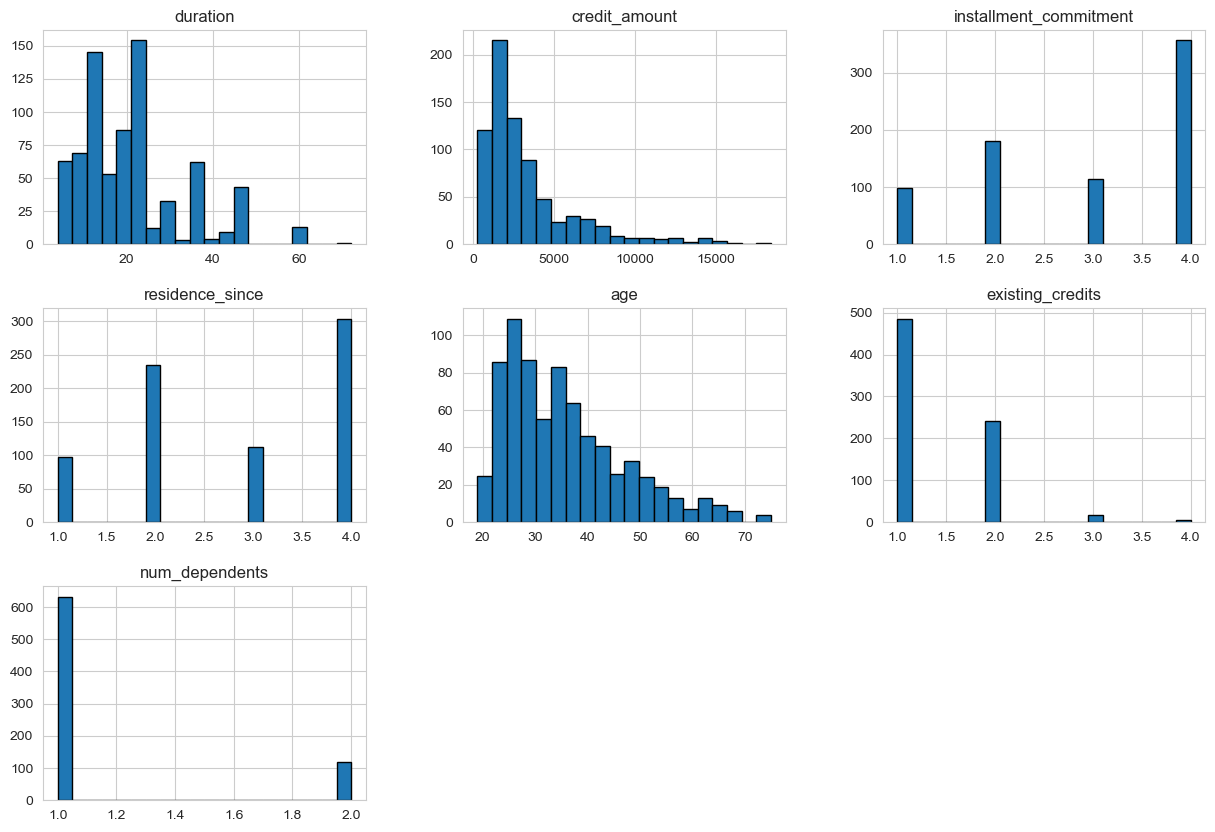

In [211]:
# Histograms
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.show()

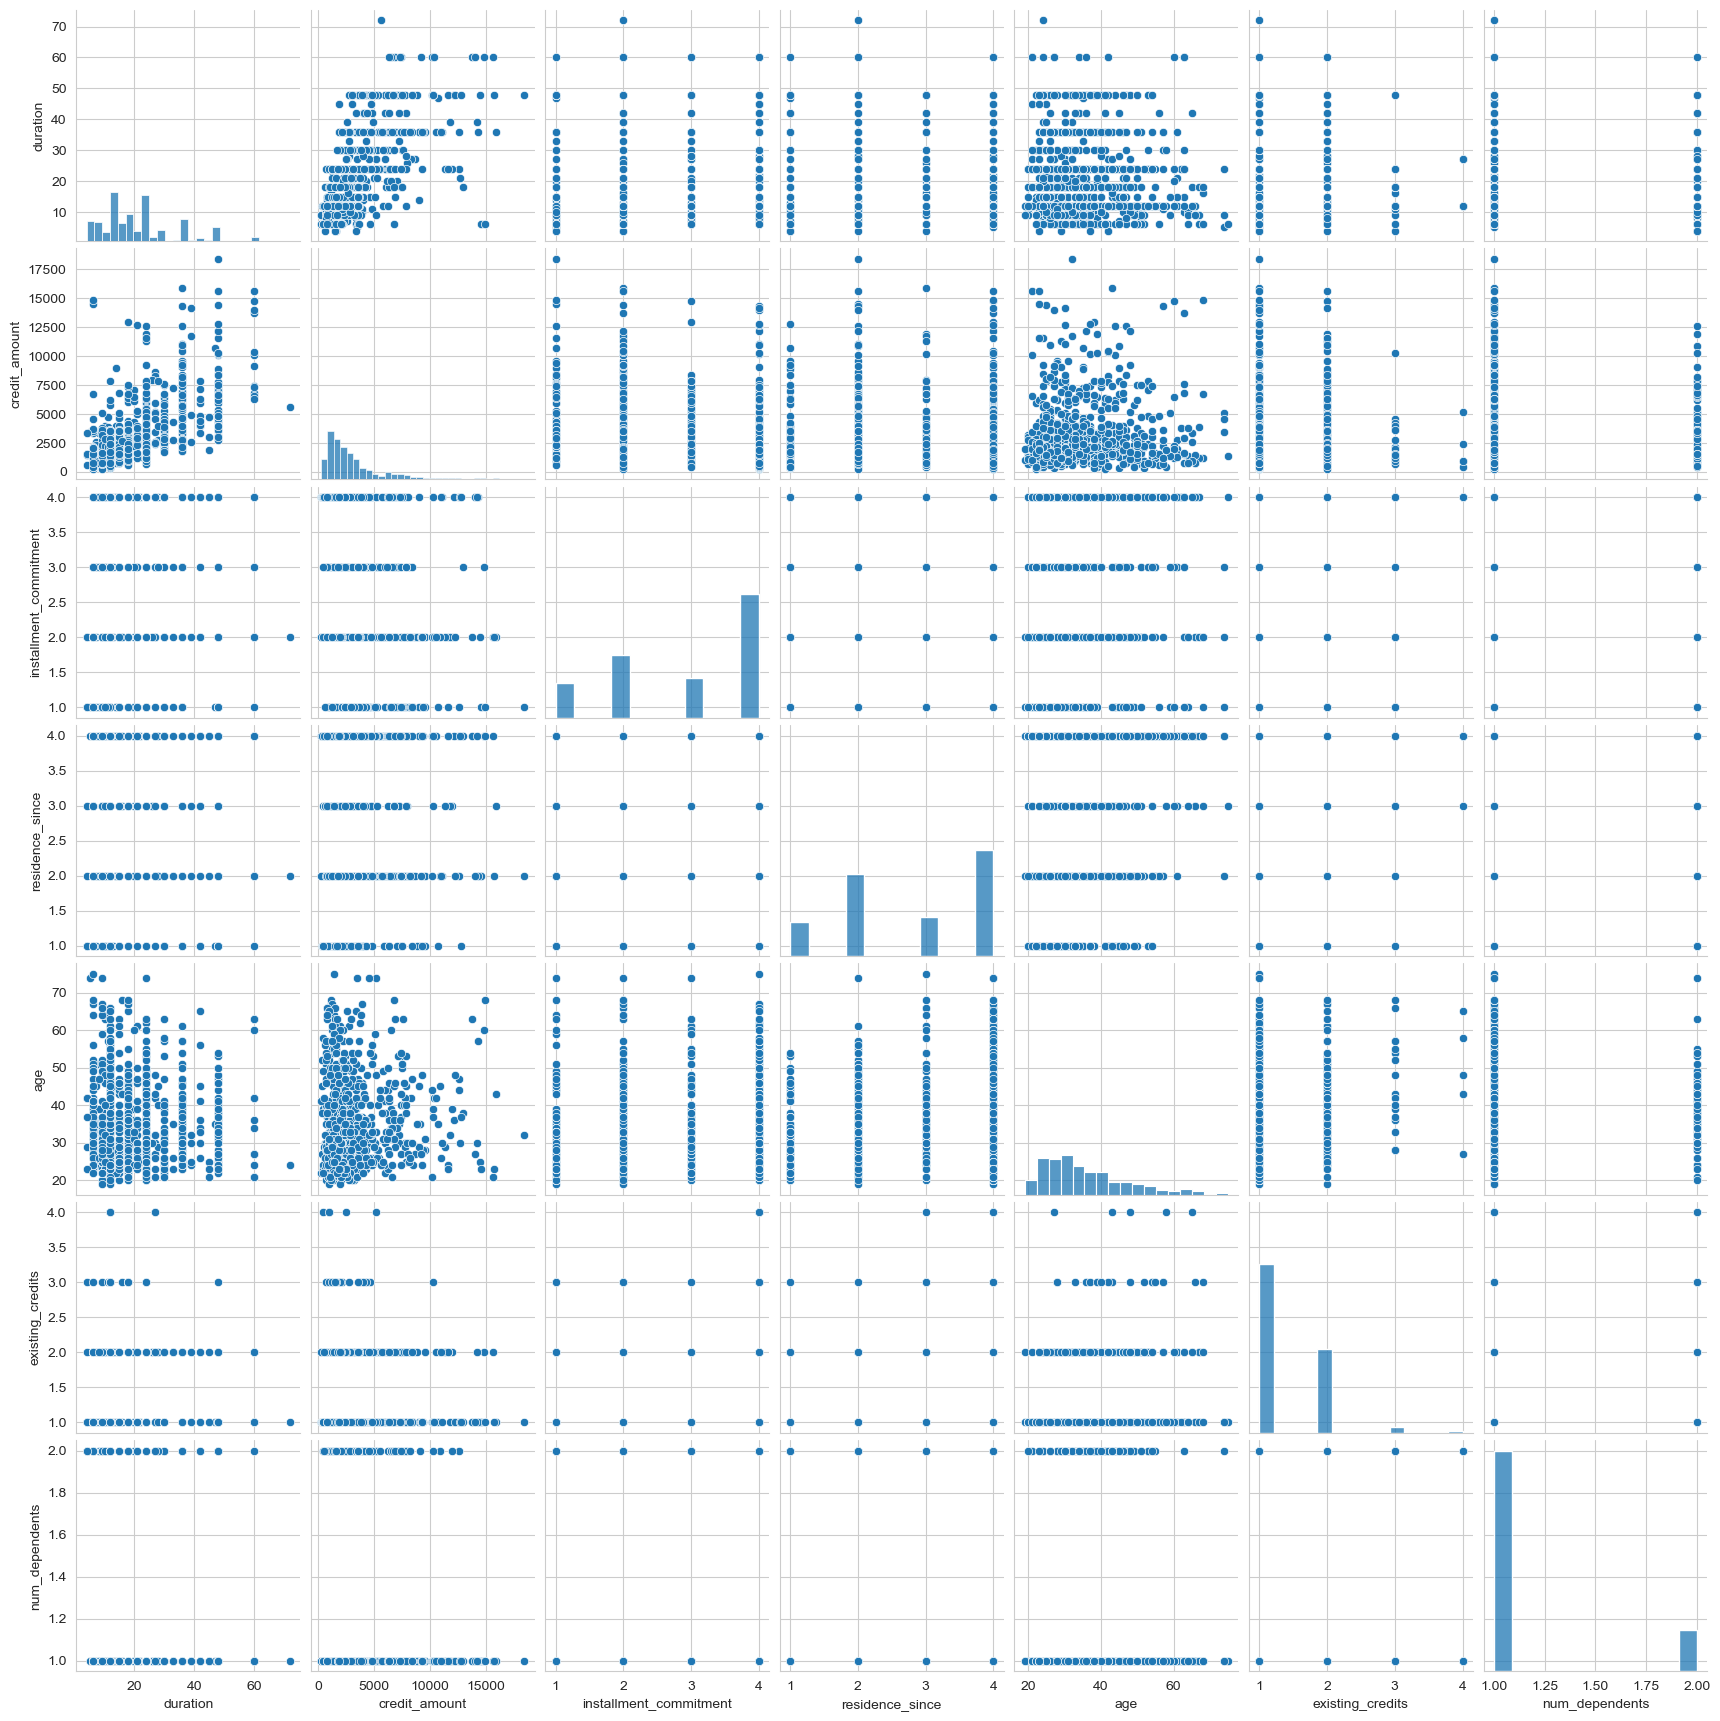

In [212]:
# Scatter Plots
sns.pairplot(numeric_data)
plt.show()

C:\Users\Bolbol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


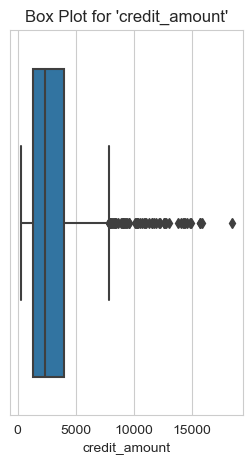

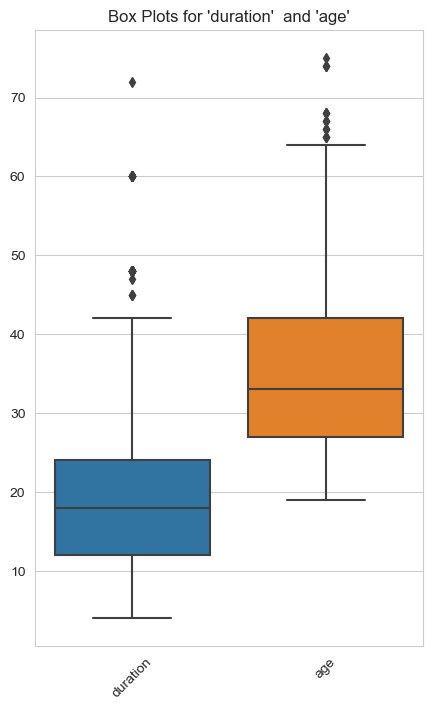

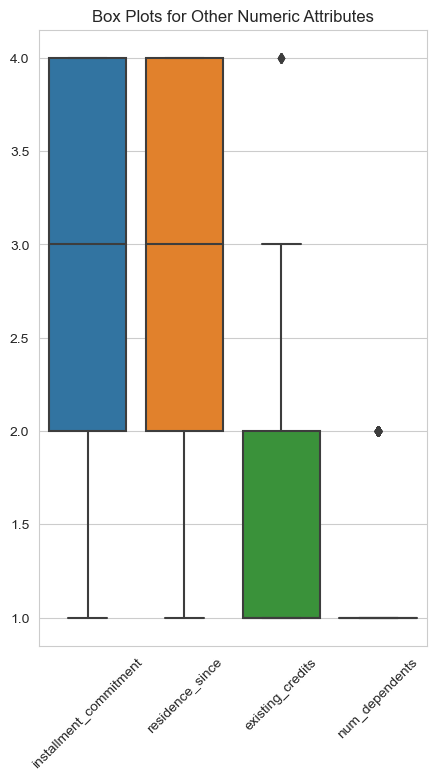

In [213]:
# Box Plot for 'credit_amount'
plt.figure(figsize=(3, 5))
sns.boxplot(data['credit_amount'])
plt.title("Box Plot for 'credit_amount'")
plt.show()

# Box Plot for 'duration'  and 'age'
plt.figure(figsize=(5, 8))
sns.boxplot(data=data[['duration', 'age']])
plt.title("Box Plots for 'duration'  and 'age'")
plt.xticks(rotation=45)
plt.show()

# Box Plot for the other numeric attributes
plt.figure(figsize=(5, 8))
sns.boxplot(data=data[['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']])
plt.title("Box Plots for Other Numeric Attributes")
plt.xticks(rotation=45)
plt.show()

### <span style="color:blue"> encoding ordinal attributes </span>


In [214]:
# 1. Label Encoding for Ordinal Data
ordinal_categories = ['checking_status', 'savings_status', 'employment', 'own_telephone', 'foreign_worker','job','class']
label_encoder = LabelEncoder()

# Apply Label Encoding to each ordinal column
for col in ordinal_categories:
    data[col] = label_encoder.fit_transform(data[col])

### <span style="color:blue"> encoding nominal attributes </span>


In [215]:
# 2. Mean Encoding for Nominal Data
nominal_att = ['credit_history', 'purpose','personal_status', 'other_parties', 'property_magnitude','housing', 'other_payment_plans']

# Apply Mean Encoding to each nominal column
for col in nominal_att:
    mean_encoding = data.groupby(col)['class'].mean().to_dict()
    data[col] = data[col].map(mean_encoding)
    

In [216]:
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6,0.832536,0.770335,1169,0,3,4,0.731884,0.691069,...,0.791045,67,0.714754,0.734694,2,3,1,1,1,1
1,1,48,0.655172,0.770335,5951,3,0,2,0.622318,0.691069,...,0.791045,22,0.714754,0.734694,1,3,1,0,1,0
2,0,12,0.832536,0.486486,2096,3,1,2,0.731884,0.691069,...,0.791045,49,0.714754,0.734694,1,2,2,0,1,1
3,2,42,0.655172,0.694444,7882,3,1,2,0.731884,0.777778,...,0.685083,45,0.714754,0.538462,1,3,2,0,1,1
4,2,24,0.734375,0.573964,4870,3,0,3,0.731884,0.691069,...,0.544643,53,0.714754,0.538462,2,3,2,0,1,0


### <span style="color:blue">Identify any outliers using z-score </span>


In [217]:
z_scores = data.select_dtypes(include=['number']).apply(zscore)

outliers = (z_scores > 3) | (z_scores < -3)

outliers_data = data[outliers.any(axis=1)]
print(f"Number of outliers detected using Z-Score: {outliers_data.shape[0]}")

Number of outliers detected using Z-Score: 86


### <span style="color:blue">Identify any outliers using LocalOutlierFactor </span>


In [218]:

# Instantiate the model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Fit the model and predict outliers
preds = lof.fit_predict(data.select_dtypes(include=['number']))

# -1 indicates an outlier, 1 indicates an inlier
outliers_data_lof = data[preds == -1]
print(f"Number of outliers detected using LOF: {len(outliers_data_lof)}")


Number of outliers detected using LOF: 38


### <span style="color:blue">Identify any outliers using isolation-tree </span>


In [219]:
IF = IsolationForest(contamination=0.1, random_state=42)
data['is_anomaly'] = IF.fit_predict(data.select_dtypes(include=['number']))
outliers_data_if = data[data['is_anomaly'] == -1]
print(f"Number of outliers detected using Isolation Forest: {len(outliers_data_if)}")


Number of outliers detected using Isolation Forest: 75


C:\Users\Bolbol\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


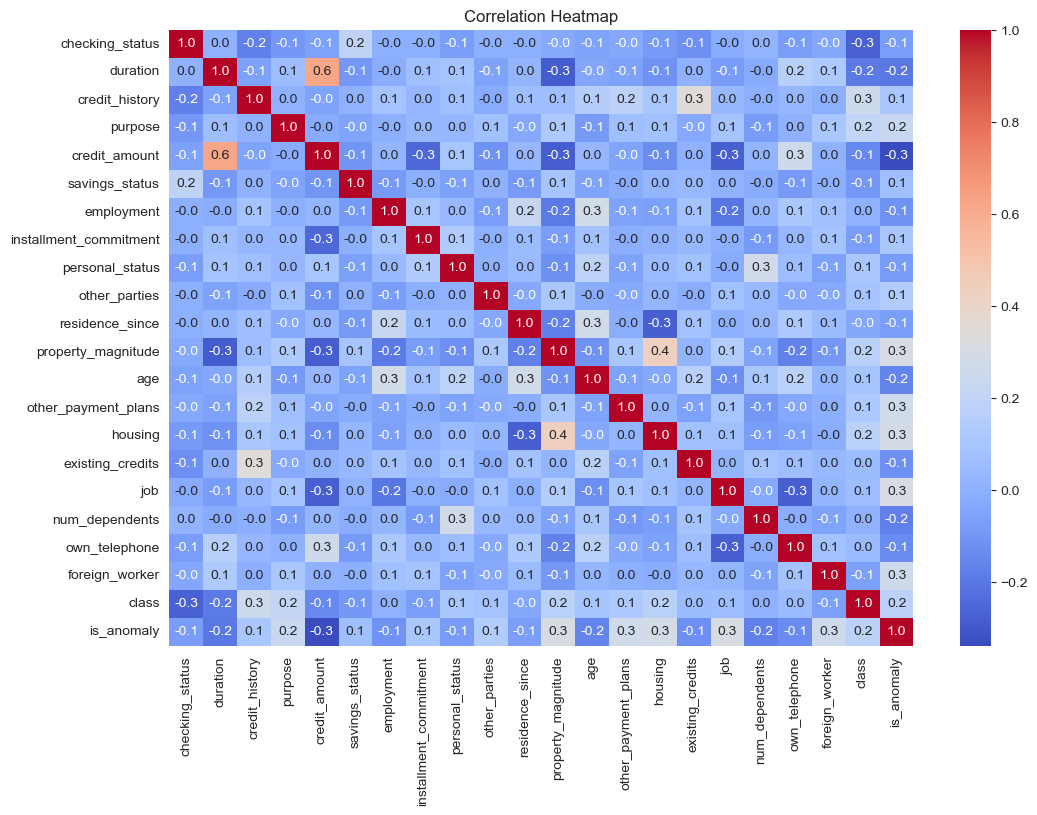

In [220]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Correlation Heatmap")
plt.show()

# <span style="color:red">Task B</span>


### <span style="color:blue">Binning Techniques:</span>


In [221]:
num_bins = 3
data['equi_width_bin'] = pd.cut(data['age'], bins=num_bins, labels=[f'bin_{i+1}' for i in range(num_bins)])

In [222]:
data['equi_depth_bin'] = pd.qcut(data['age'], q=num_bins, labels=[f'bin_{i+1}' for i in range(num_bins)])
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,is_anomaly,equi_width_bin,equi_depth_bin
0,2,6,0.832536,0.770335,1169,0,3,4,0.731884,0.691069,...,0.734694,2,3,1,1,1,1,1,bin_3,bin_3
1,1,48,0.655172,0.770335,5951,3,0,2,0.622318,0.691069,...,0.734694,1,3,1,0,1,0,1,bin_1,bin_1
2,0,12,0.832536,0.486486,2096,3,1,2,0.731884,0.691069,...,0.734694,1,2,2,0,1,1,1,bin_2,bin_3
3,2,42,0.655172,0.694444,7882,3,1,2,0.731884,0.777778,...,0.538462,1,3,2,0,1,1,1,bin_2,bin_3
4,2,24,0.734375,0.573964,4870,3,0,3,0.731884,0.691069,...,0.538462,2,3,2,0,1,0,1,bin_2,bin_3


In [223]:
data['equi_width_bin'].value_counts()

bin_1    489
bin_2    212
bin_3     49
Name: equi_width_bin, dtype: int64

In [224]:
data['equi_depth_bin'].value_counts()

bin_1    272
bin_3    241
bin_2    237
Name: equi_depth_bin, dtype: int64

### <span style="color:blue">Normalization Techniques</span>


In [225]:
scaler = MinMaxScaler()
data['min_max_normalized'] = scaler.fit_transform(data[['credit_amount']])
scaler = StandardScaler()
data['z_score_normalized'] = scaler.fit_transform(data[['credit_amount']])
data.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,job,num_dependents,own_telephone,foreign_worker,class,is_anomaly,equi_width_bin,equi_depth_bin,min_max_normalized,z_score_normalized
0,2,6,0.832536,0.770335,1169,0,3,4,0.731884,0.691069,...,3,1,1,1,1,1,bin_3,bin_3,0.050567,-0.729510
1,1,48,0.655172,0.770335,5951,3,0,2,0.622318,0.691069,...,3,1,0,1,0,1,bin_1,bin_1,0.313690,0.925758
2,0,12,0.832536,0.486486,2096,3,1,2,0.731884,0.691069,...,2,2,0,1,1,1,bin_2,bin_3,0.101574,-0.408633
3,2,42,0.655172,0.694444,7882,3,1,2,0.731884,0.777778,...,3,2,0,1,1,1,bin_2,bin_3,0.419941,1.594165
4,2,24,0.734375,0.573964,4870,3,0,3,0.731884,0.691069,...,3,2,0,1,0,1,bin_2,bin_3,0.254209,0.551575


### <span style="color:blue">Discretization of Age</span>


In [226]:
bins = [18, 25, 30, 45, 65, np.inf]
labels = ['Teenager', 'Young', 'Mid_Age', 'Mature', 'Old']
data['Age_Category'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)
data['Age_Category'].value_counts()

Mid_Age     301
Young       161
Teenager    146
Mature      129
Old          13
Name: Age_Category, dtype: int64

### <span style="color:blue">Binary Encoding of Categorical Variables</span>


In [227]:
df = pd.get_dummies(df, columns=['purpose'], dtype=int)
df.head()

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,...,purpose_'domestic appliance',purpose_'new car',purpose_'used car',purpose_business,purpose_education,purpose_furniture/equipment,purpose_other,purpose_radio/tv,purpose_repairs,purpose_retraining
0,<0,6,'critical/other existing credit',1169,'no known savings',>=7,4,'male single',none,4,...,0,0,0,0,0,0,0,1,0,0
1,0<=X<200,48,'existing paid',5951,<100,1<=X<4,2,'female div/dep/mar',none,2,...,0,0,0,0,0,0,0,1,0,0
2,'no checking',12,'critical/other existing credit',2096,<100,4<=X<7,2,'male single',none,3,...,0,0,0,0,1,0,0,0,0,0
3,<0,42,'existing paid',7882,<100,4<=X<7,2,'male single',guarantor,4,...,0,0,0,0,0,1,0,0,0,0
4,<0,24,'delayed previously',4870,<100,1<=X<4,3,'male single',none,4,...,0,1,0,0,0,0,0,0,0,0


### <span style="color:blue">Data reduction : PCA</span>


In [228]:
numerical_data = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[numerical_data])
df_pca = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
df_pca.head()

,PCA1,PCA2
0,-2107.552881,33.067905
1,2674.536557,-17.962496
2,-1180.542254,14.592547
3,4605.516579,6.758647
4,1593.480251,17.159497


In [229]:
# Explained variance for PCA
pca.explained_variance_ratio_

array([9.99973001e-01, 1.55735445e-05])

### <span style="color:blue">Data reduction : KPCA</span>


In [248]:
# Kernel PCA with RBF kernel
kpca = KernelPCA(n_components=2, kernel='rbf',gamma=100)
kpca_result = kpca.fit_transform(data[numerical_data])
df_kpca = pd.DataFrame(data=kpca_result, columns=['KPCA1', 'KPCA2'])
df_kpca.head()

,KPCA1,KPCA2
0,-0.011038,0.023835
1,-0.209219,0.043902
2,-0.008666,-0.018979
3,-0.001040,0.007931
4,-0.012369,-0.029922


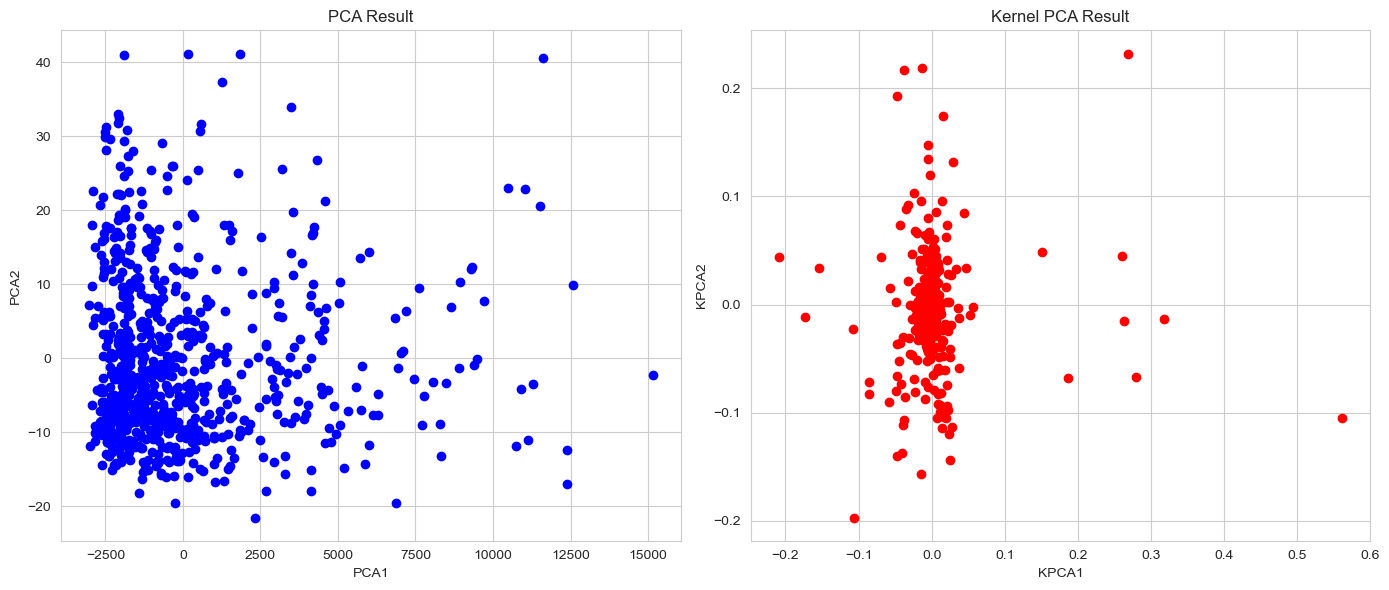

In [249]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c='blue')
plt.title('PCA Result')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(1, 2, 2)
plt.scatter(df_kpca['KPCA1'], df_kpca['KPCA2'], c='red')
plt.title('Kernel PCA Result')
plt.xlabel('KPCA1')
plt.ylabel('KPCA2')

plt.tight_layout()
plt.show()

# <span style="color:red">Task C</span>


### <span style="color:blue">Data preparation</span>


In [250]:
df=pd.read_csv('Community-Participation-DataSet(1).csv')
df.head()

,Record#,Elapsed_Time,Time_in_Community,Gender,Working,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group
0,1,6.86,Medium,F,Yes,25,No,Yes,No,No,No,No,No
1,2,9.34,Medium,M,No,32,No,No,No,No,Yes,No,No
2,3,9.52,Short,M,Yes,24,No,No,No,No,No,No,No
3,4,8.31,Long,F,Yes,44,No,No,Yes,No,No,No,No
4,5,2.64,Long,F,No,37,No,No,No,No,No,No,No


In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Record#            2000 non-null   int64  
 1   Elapsed_Time       2000 non-null   float64
 2   Time_in_Community  2000 non-null   object 
 3   Gender             2000 non-null   object 
 4   Working            2000 non-null   object 
 5   Age                2000 non-null   int64  
 6   Family             2000 non-null   object 
 7   Hobbies            2000 non-null   object 
 8   Social_Club        2000 non-null   object 
 9   Political          2000 non-null   object 
 10  Professional       2000 non-null   object 
 11  Religious          2000 non-null   object 
 12  Support_Group      2000 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 203.2+ KB


In [252]:
df.shape

(2000, 13)

In [253]:
df.describe()

,Record#,Elapsed_Time,Age
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,5.940875,36.634500
std,577.494589,2.290591,10.558629
min,1.000000,2.010000,17.000000
25%,500.750000,3.870000,28.000000
50%,1000.500000,5.980000,36.000000
75%,1500.250000,7.880000,46.000000
max,2000.000000,10.150000,57.000000


In [254]:
bins = [ 16, 24, 35, 50, 60]
labels = ['Teenager', 'Young', 'Mid_Age', 'Mature']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
category_counts = df['Age'].value_counts()
print(category_counts)
df.head()

Mid_Age     794
Young       645
Teenager    318
Mature      243
Name: Age, dtype: int64


,Record#,Elapsed_Time,Time_in_Community,Gender,Working,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group
0,1,6.86,Medium,F,Yes,Young,No,Yes,No,No,No,No,No
1,2,9.34,Medium,M,No,Young,No,No,No,No,Yes,No,No
2,3,9.52,Short,M,Yes,Teenager,No,No,No,No,No,No,No
3,4,8.31,Long,F,Yes,Mid_Age,No,No,Yes,No,No,No,No
4,5,2.64,Long,F,No,Mid_Age,No,No,No,No,No,No,No


In [255]:
df = df.drop('Record#', axis=1)
df = df.drop('Elapsed_Time', axis=1)

In [256]:
columns_to_transform = ['Family', 'Hobbies', 'Social_Club', 'Political', 'Professional', 'Religious', 'Support_Group']

for column in columns_to_transform:
    df[column] = df[column].apply(lambda x: f"{x}_{column}" if x in ['Yes', 'No'] else x)
df

,Time_in_Community,Gender,Working,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group
0,Medium,F,Yes,Young,No_Family,Yes_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
1,Medium,M,No,Young,No_Family,No_Hobbies,No_Social_Club,No_Political,Yes_Professional,No_Religious,No_Support_Group
2,Short,M,Yes,Teenager,No_Family,No_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
3,Long,F,Yes,Mid_Age,No_Family,No_Hobbies,Yes_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
4,Long,F,No,Mid_Age,No_Family,No_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
...,...,...,...,...,...,...,...,...,...,...,...
1995,Long,F,Yes,Young,No_Family,No_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
1996,Short,M,No,Mid_Age,No_Family,No_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
1997,Long,F,Yes,Young,No_Family,Yes_Hobbies,No_Social_Club,No_Political,No_Professional,Yes_Religious,No_Support_Group
1998,Short,F,No,Mid_Age,No_Family,No_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group


In [257]:
df.to_csv('eclat_file.csv', index=False)

In [258]:
df = df.astype(str)  # Convert all columns to string type
txns = df.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]
txns = [[item.strip() for item in txn] for txn in txns]
# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]
# Initialize an empty list
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'TID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn

,TID,Item
0,1,Medium
1,1,F
2,1,Yes
3,1,Young
4,1,No_Family
...,...,...
21995,2000,No_Social_Club
21996,2000,No_Political
21997,2000,Yes_Professional
21998,2000,No_Religious


In [259]:
# Find the top 30 most frequent items
top_items = df_txn['Item'].value_counts().reset_index()

# Convert the top 30 items into DataFrame and sort by item count in descending order
df_top_items = pd.DataFrame(top_items)
df_top_items.columns = ['Item', 'Count']

# Calculate the percentage of transactions for each item
total_transactions = len(df)
df_top_items['% Count'] = (df_top_items['Count']*100 / total_transactions).round(2)

# Display the results
df_top_items.style.background_gradient(cmap='Blues')

,Item,Count,% Count
0,No_Political,1825,91.250000
1,No_Support_Group,1675,83.750000
2,No_Social_Club,1629,81.450000
3,No_Hobbies,1424,71.200000
4,No_Professional,1382,69.100000
5,No_Family,1232,61.600000
6,No_Religious,1173,58.650000
7,F,1048,52.400000
8,Yes,1009,50.450000
9,No,991,49.550000


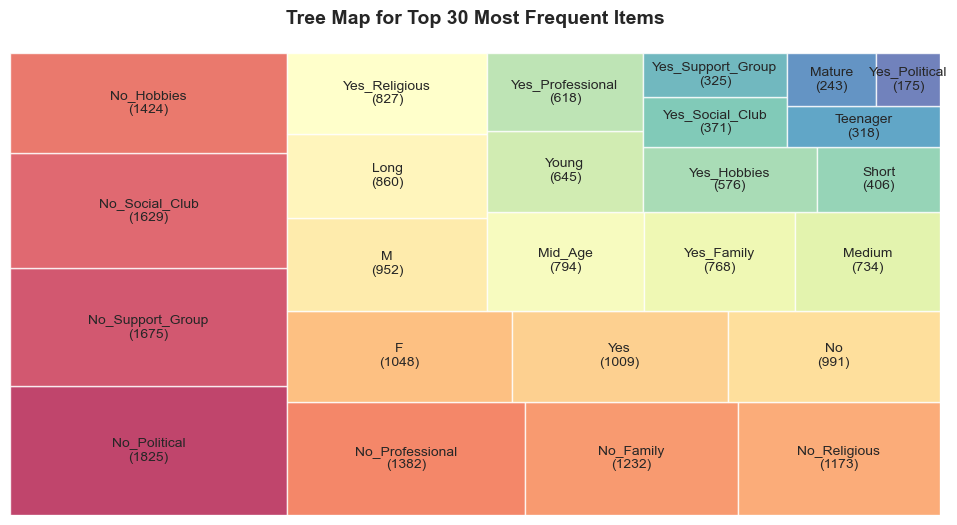

In [260]:
import seaborn as sns
sns.set_style("whitegrid")
import squarify

# Convert 'Count' column to integers
df_top_items['Count'] = df_top_items['Count'].astype(int)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Top 30 items
df_top_30items = df_top_items.head(30)

# Calculate treemap sizes
sizes = df_top_30items['Count']

# Calculate treemap labels
labels = [f"{item}\n({count})" for item, count in zip(df_top_30items['Item'], df_top_30items['Count'])]

# Plot the treemap
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette("Spectral", len(df_top_30items)), text_kwargs={'fontsize':10}, ax=ax)

plt.axis('off')
plt.title("Tree Map for Top 30 Most Frequent Items\n", fontsize=14, fontweight=700)
plt.show()

In [261]:
df1 = pd.get_dummies(df)
df1.shape

(2000, 25)

### <span style="color:blue">association rule mining techniques </span>


#### <span style="color:green">Apriori </span>


In [262]:
from mlxtend.frequent_patterns import apriori, association_rules

df_apriori = apriori(df1, min_support=0.3,  use_colnames=True)

C:\Users\Bolbol\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [263]:
rules = association_rules(df_apriori, metric="confidence", min_threshold=0.3)

sorted_rules = rules.sort_values(['support'], ascending=[ False])
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
113,(Political_No_Political),(Support_Group_No_Support_Group),0.9125,0.8375,0.7845,0.859726,1.026539,0.020281,1.158447,0.295457
112,(Support_Group_No_Support_Group),(Political_No_Political),0.8375,0.9125,0.7845,0.936716,1.026539,0.020281,1.382665,0.159092
99,(Political_No_Political),(Social_Club_No_Social_Club),0.9125,0.8145,0.7495,0.821370,1.008434,0.006269,1.038459,0.095588
98,(Social_Club_No_Social_Club),(Political_No_Political),0.8145,0.9125,0.7495,0.920196,1.008434,0.006269,1.096442,0.045088
104,(Social_Club_No_Social_Club),(Support_Group_No_Support_Group),0.8145,0.8375,0.6945,0.852670,1.018114,0.012356,1.102969,0.095911
...,...,...,...,...,...,...,...,...,...,...
955,"(Hobbies_No_Hobbies, Professional_No_Professio...",(Religious_No_Religious),0.4210,0.5865,0.3000,0.712589,1.214986,0.053083,1.438707,0.305604
954,"(Hobbies_No_Hobbies, Professional_No_Professio...",(Support_Group_No_Support_Group),0.3510,0.8375,0.3000,0.854701,1.020538,0.006037,1.118382,0.031009
40,(Working_No),(Family_No_Family),0.4955,0.6160,0.3000,0.605449,0.982872,-0.005228,0.973258,-0.033389
41,(Family_No_Family),(Working_No),0.6160,0.4955,0.3000,0.487013,0.982872,-0.005228,0.983456,-0.043412


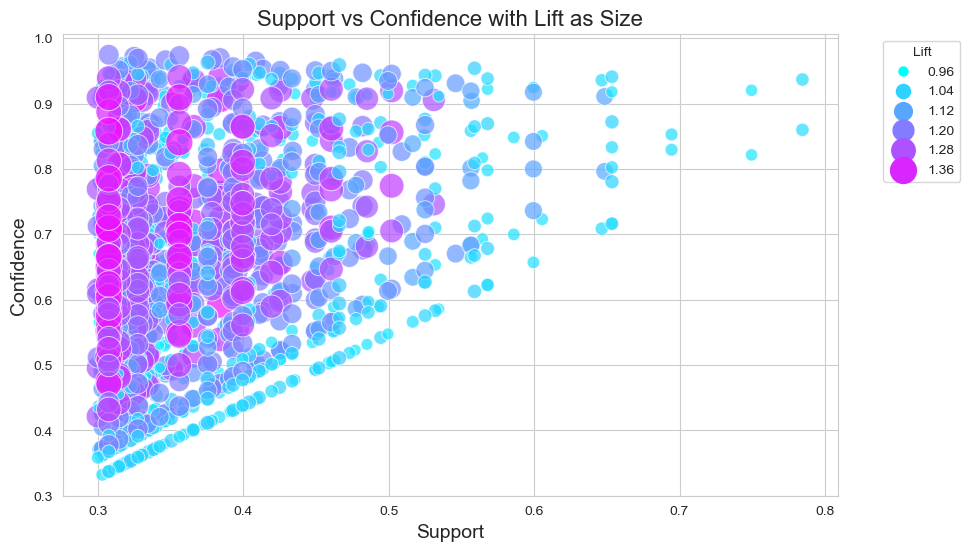

'Support (x-axis): How frequently the rule appears in the dataset.\nConfidence (y-axis): How often the rule is found to be true.\nLift (size and color): The strength of the rule (greater than 1 indicates a strong rule).'

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of support, confidence, and lift
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='cool', sizes=(40, 400), legend=True, alpha=0.7)

# Add labels and title
plt.title('Support vs Confidence with Lift as Size', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Confidence', fontsize=14)

# Show the plot
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
'''Support (x-axis): How frequently the rule appears in the dataset.
Confidence (y-axis): How often the rule is found to be true.
Lift (size and color): The strength of the rule (greater than 1 indicates a strong rule).'''

#### <span style="color:green">FP-Growth </span>


In [265]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
frequent_itemsets = fpgrowth(df1, min_support=0.3, use_colnames=True)
print(frequent_itemsets)

     support                                           itemsets
0     0.9125                           (Political_No_Political)
1     0.8375                   (Support_Group_No_Support_Group)
2     0.8145                       (Social_Club_No_Social_Club)
3     0.6910                     (Professional_No_Professional)
4     0.6160                                 (Family_No_Family)
..       ...                                                ...
189   0.3445  (Religious_Yes_Religious, Support_Group_No_Sup...
190   0.3010  (Religious_Yes_Religious, Professional_No_Prof...
191   0.3225  (Religious_Yes_Religious, Support_Group_No_Sup...
192   0.3445        (Family_Yes_Family, Political_No_Political)
193   0.3130  (Family_Yes_Family, Support_Group_No_Support_G...

[194 rows x 2 columns]


C:\Users\Bolbol\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [266]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
# Sorting rules by support
sorted_rules = rules.sort_values([ 'support'], ascending=[ False])
sorted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Support_Group_No_Support_Group),(Political_No_Political),0.8375,0.9125,0.7845,0.936716,1.026539,0.020281,1.382665,0.159092
1,(Political_No_Political),(Support_Group_No_Support_Group),0.9125,0.8375,0.7845,0.859726,1.026539,0.020281,1.158447,0.295457
2,(Social_Club_No_Social_Club),(Political_No_Political),0.8145,0.9125,0.7495,0.920196,1.008434,0.006269,1.096442,0.045088
3,(Political_No_Political),(Social_Club_No_Social_Club),0.9125,0.8145,0.7495,0.821370,1.008434,0.006269,1.038459,0.095588
4,(Social_Club_No_Social_Club),(Support_Group_No_Support_Group),0.8145,0.8375,0.6945,0.852670,1.018114,0.012356,1.102969,0.095911
...,...,...,...,...,...,...,...,...,...,...
1230,(Working_No),(Family_No_Family),0.4955,0.6160,0.3000,0.605449,0.982872,-0.005228,0.973258,-0.033389
908,"(Hobbies_No_Hobbies, Professional_No_Professio...",(Support_Group_No_Support_Group),0.3510,0.8375,0.3000,0.854701,1.020538,0.006037,1.118382,0.031009
907,"(Hobbies_No_Hobbies, Religious_No_Religious, S...",(Professional_No_Professional),0.4475,0.6910,0.3000,0.670391,0.970175,-0.009222,0.937475,-0.052708
906,"(Hobbies_No_Hobbies, Professional_No_Professio...",(Religious_No_Religious),0.4210,0.5865,0.3000,0.712589,1.214986,0.053083,1.438707,0.305604


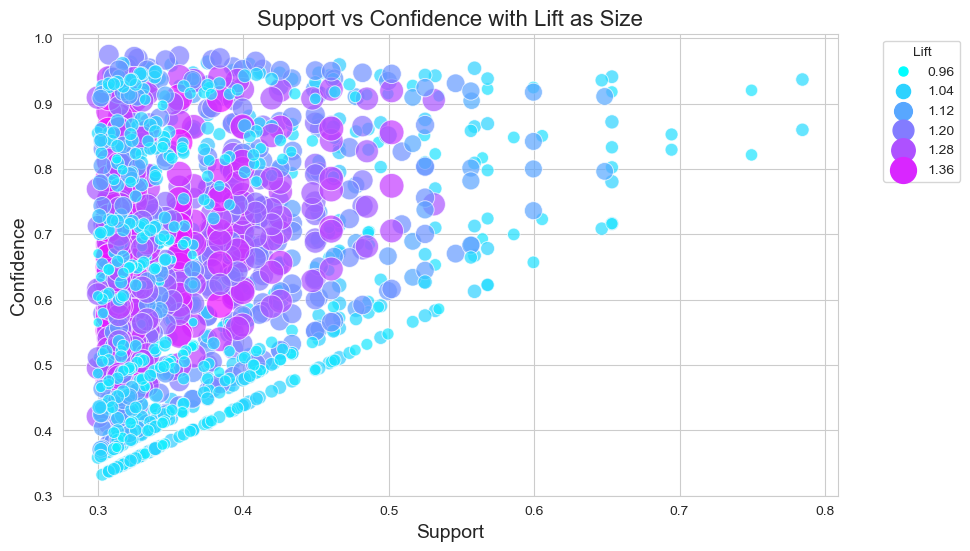

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='cool', sizes=(40, 400), legend=True, alpha=0.7)
plt.title('Support vs Confidence with Lift as Size', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
plt.legend(title='Lift', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#### <span style="color:green">ECLAT </span>


In [268]:
from pyECLAT import ECLAT


eclat=pd.read_csv('eclat_file.csv',header=None)
eclat

,0,1,2,3,4,5,6,7,8,9,10
0,Time_in_Community,Gender,Working,Age,Family,Hobbies,Social_Club,Political,Professional,Religious,Support_Group
1,Medium,F,Yes,Young,No_Family,Yes_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
2,Medium,M,No,Young,No_Family,No_Hobbies,No_Social_Club,No_Political,Yes_Professional,No_Religious,No_Support_Group
3,Short,M,Yes,Teenager,No_Family,No_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
4,Long,F,Yes,Mid_Age,No_Family,No_Hobbies,Yes_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
...,...,...,...,...,...,...,...,...,...,...,...
1996,Long,F,Yes,Young,No_Family,No_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
1997,Short,M,No,Mid_Age,No_Family,No_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group
1998,Long,F,Yes,Young,No_Family,Yes_Hobbies,No_Social_Club,No_Political,No_Professional,Yes_Religious,No_Support_Group
1999,Short,F,No,Mid_Age,No_Family,No_Hobbies,No_Social_Club,No_Political,No_Professional,No_Religious,No_Support_Group


In [269]:
# Generate transaction lists

txns = eclat.fillna("").values.tolist()
txns = [[item for item in txn if item != ''] for txn in txns]

# Create a list of unique ids for the transactions
ids = [i + 1 for i in range(len(txns))]

# Initialize an empty list
data =[]
# Iterate through transactions and add them to the DataFrame with IDs
for i, txn in enumerate(txns):
    data.extend([{'TID': ids[i], 'Item': item} for item in txn])

df_txn = pd.DataFrame(data)
df_txn.head(25)

,TID,Item
0,1,Time_in_Community
1,1,Gender
2,1,Working
3,1,Age
4,1,Family
5,1,Hobbies
6,1,Social_Club
7,1,Political
8,1,Professional
9,1,Religious


In [270]:

# Load your dataset
df = pd.read_csv('eclat_file.csv',header=None)

# Initialize ECLAT model
eclat_instance = ECLAT(data=df, verbose=True)

# Apply ECLAT
rule_indices, support = eclat_instance.fit(min_support=0.05, min_combination=1, max_combination=3)


100%|█████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 696.38it/s]


Combination 1 by 1


25it [00:00, 138.01it/s]


Combination 2 by 2


300it [00:02, 135.32it/s]


Combination 3 by 3


2300it [00:28, 81.78it/s] 


In [271]:
results = pd.DataFrame(list(support.items()), columns=['Itemset', 'Support'])
results
sorted_rules = results.sort_values([ 'Support'], ascending=[ False])
sorted_rules

,Itemset,Support
19,No_Political,0.912044
16,No_Support_Group,0.837081
6,No_Social_Club,0.814093
239,No_Support_Group & No_Political,0.784108
128,No_Social_Club & No_Political,0.749125
...,...,...
349,Mid_Age & Yes_Social_Club & Yes_Family,0.050975
644,Mature & No_Social_Club & Yes,0.050975
864,No_Social_Club & Yes_Hobbies & Yes_Professional,0.050475
715,Young & Yes & Yes_Hobbies,0.050475


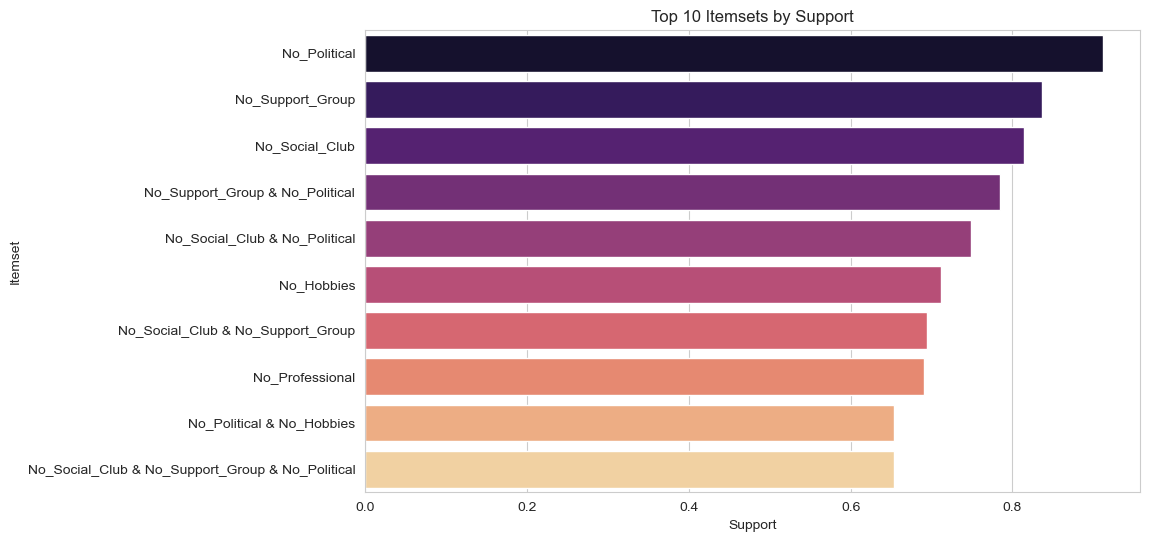

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by support for better visualization
results = results.sort_values(by='Support', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Support', y='Itemset', data=results.head(10), palette='magma')
plt.title('Top 10 Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemset')
plt.show()
